In [2]:
from functools import partial
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torch.nn as nn
import torch.utils.data as data
from sklearn.datasets import make_moons
import pickle 
from collections import defaultdict
import seaborn as sns 
import numpy as np 

def rec_dd():
    return defaultdict(rec_dd)

import sys
sys.path.append("../psvi")

C1 = sns.xkcd_rgb["green"]
C2 = sns.xkcd_rgb["orange"]
C3 = sns.xkcd_rgb["blue"]
C4 = sns.xkcd_rgb["red"]
COLS = np.array([C1, C2, C3, C4])
UC1 = sns.xkcd_rgb["green"]
UC2 = sns.xkcd_rgb["orange"]
UC3 = sns.xkcd_rgb["blue"]
UC4 = sns.xkcd_rgb["red"]
UCOLS = np.array([UC1, UC2, UC3, UC4])
title_font = {'size':'28'}
EXTENT = (-3, 4, -2, 3)
dnm = 'halfmoon'
n_test_per_dim = 250
def make_grid(n_test_per_dim=n_test_per_dim):
    _x0_test = torch.linspace(-3, 4, n_test_per_dim)
    _x1_test = torch.linspace(-2, 3, n_test_per_dim)
    return torch.stack(torch.meshgrid(_x0_test, _x1_test), dim=-1)

coreset_sizes = 50
N = 1000
(X, Y) = make_moons(n_samples=N, noise=0.1, random_state=42)
X, Y = torch.from_numpy(X.astype(np.float32)), torch.from_numpy(
                Y[...,None].astype(np.float32)
            )
    
def predictive_entropy(g):
    p = g[0,...]
    return -p*np.log(p) - (1-p)*np.log(1-p)

/home/dionm/.local/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
! \
python3 ../experiments/flow_psvi.py \
--num_epochs 2501 \
--log_every 200 \
--lr0net 2e-4 \
--n_hidden 50 \
--datasets halfmoon \
--architecture fn2 \
--methods mfvi \
--num_trials 1 \
--init_sd 1e-10 \
--data_minibatch 512\
--log_pseudodata \
--mc_samples 64\
--fnm fullcov


Reading/Generating the dataset HALFMOON

Bayesian neural network experiment.
Inference via MFVI on halfmoon data over 1 trial.





Running mfvi

Trial #0
Unconstrained data access
outer architecture : fn2
  0%|                                                  | 0/5002 [00:00<?, ?it/s]/home/dionm/miniconda3/lib/python3.9/site-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2895.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
predictive accuracy: 50.50%
100%|██████████████████████████████████████▉| 5000/5002 [04:57<00:00, 17.09it/s]predictive accuracy: 99.50%
predictive accuracy: 99.50%
100%|███████████████████████████████████████| 5002/5002 [04:57<00:00, 16.81it/s]
Trial completed!

Storing results in ../results/fullcov.pk


/tmp/ipykernel_14942/876338518.py:55: RuntimeWarning: divide by zero encountered in log
  return -p*np.log(p) - (1-p)*np.log(1-p)
/tmp/ipykernel_14942/876338518.py:55: RuntimeWarning: invalid value encountered in multiply
  return -p*np.log(p) - (1-p)*np.log(1-p)


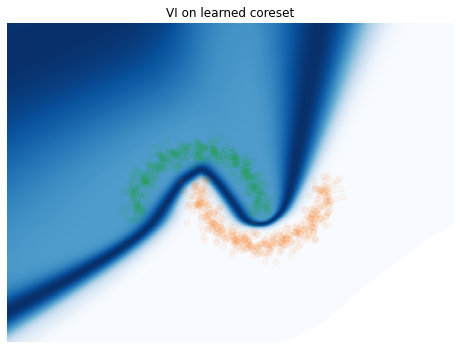

In [10]:
meth = 'mfvi'
coreset_sizes = -1
with open('../results/fullcov.pk', 'rb') as f:
       results = pickle.load(f)
gpreds = (
        results[dnm][meth][-1][0]['grid_preds'],
)
def plot_full(idx=-1, a0=0.05, a1=0.9, ax=None):
    if ax is None:
        f, ax = plt.subplots(1, 1, figsize=(8, 8))
    ax.scatter(X[:, 0], X[:, 1], c=COLS[Y.squeeze().int().numpy()], alpha=a0)
    ents = predictive_entropy(gpreds[idx][-1]).reshape((250, 250)).T
    ax.imshow(ents, extent=EXTENT, origin="lower", cmap='Blues')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.axis('off')
    plt.title('VI on learned coreset')
    plt.show()
plot_full()

In [35]:
torch.cuda.empty_cache()

! \
python3 ../experiments/flow_psvi.py \
--num_epochs 5001 \
--inner_it 100 \
--log_every 200 \
--lr0u 1e-7 \
--lr0v 1e-7 \
--lr0net 1e-3 \
--n_hidden 50 \
--datasets halfmoon\
--architecture fn2 \
--methods psvi_learn_v\
--num_trials 1 \
--init_at subsample \
--init_sd 1e-5 \
--data_minibatch 128\
--log_pseudodata \
--coreset_sizes 64\
--mc_samples 64\
--fnm fullcov\
--trainer hyper


Reading/Generating the dataset HALFMOON

Bayesian neural network experiment.
Inference via PSVI_LEARN_V on halfmoon data over 1 trial.





Running psvi_learn_v

Trial #0
Coreset/Subset with 64 datapoints
SETTING UP THE MODEL 


architecture : fn2
  0%|                                                  | 0/5001 [00:00<?, ?it/s]second term tensor([1520.3517, 1516.7902, 1529.3739, 1521.3885, 1523.3922, 1509.3047,
        1514.3756, 1510.2081, 1508.7117, 1510.4327, 1496.7621, 1523.0945,
        1499.1127, 1523.7996, 1529.9670, 1520.3245, 1516.6361, 1522.1854,
        1509.5485, 1505.9147, 1523.7471, 1523.1002, 1519.2290, 1520.2125,
        1516.7062, 1504.1310, 1512.0505, 1523.5677, 1516.2742, 1518.5651,
        1497.9524, 1517.7395, 1507.3685, 1509.7526, 1502.2972, 1517.0465,
        1506.6536, 1516.9247, 1506.3148, 1518.1228, 1513.1124, 1494.5435,
        1519.0763, 1507.9503, 1512.1107, 1508.4919, 1521.3171, 1511.4072,
        1508.7190, 1523.7622, 1505.0776, 1530.9536, 1489.0725, 1520

second term tensor([1522.2908, 1518.7656, 1520.1853, 1519.9290, 1516.8962, 1506.2457,
        1520.9893, 1512.9304, 1515.1772, 1510.0779, 1505.3984, 1497.9460,
        1509.5498, 1513.4694, 1513.3159, 1512.4830, 1523.8838, 1517.7013,
        1513.0914, 1509.3528, 1517.9293, 1515.8015, 1502.7399, 1521.0867,
        1490.5118, 1518.4014, 1512.6592, 1516.8094, 1522.8262, 1500.3674,
        1503.9807, 1525.2200, 1517.6083, 1509.7971, 1527.4795, 1527.0215,
        1504.9911, 1517.7235, 1516.7994, 1527.4539, 1517.0286, 1515.0162,
        1504.1080, 1511.6951, 1510.2581, 1532.4288, 1508.8363, 1507.4357,
        1516.9069, 1513.4413, 1518.0389, 1515.2933, 1517.0404, 1525.5774,
        1509.7448, 1511.2524, 1515.5546, 1523.1482, 1514.6639, 1506.3895,
        1522.6570, 1505.3098, 1521.5498, 1518.7788], device='cuda:0') | tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

TypeError: unhashable type: 'slice'

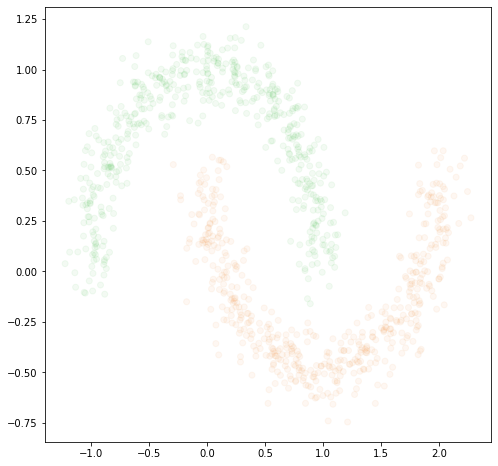

In [5]:
coreset_sizes=10
meth = 'psvi_alpha_v'
with open('../results/fullcov.pk', 'rb') as f:
       results = pickle.load(f)
us, zs, vs, gpreds = (
        results[dnm][meth][coreset_sizes][0]['us'],
        results[dnm][meth][coreset_sizes][0]['zs'],
        results[dnm][meth][coreset_sizes][0]['vs'],
        results[dnm][meth][coreset_sizes][0]['grid_preds'],
)

def plot_full(idx=-1, a0=0.05, a1=0.9, ax=None):
    if ax is None:
        f, ax = plt.subplots(1, 1, figsize=(8, 8))
    ax.scatter(X[:, 0], X[:, 1], c=COLS[Y.squeeze().int().numpy()], alpha=a0)
    ax.scatter(us[idx][:, 0], us[idx][:, 1], c=UCOLS[torch.tensor(zs[idx]).squeeze().int().numpy()], alpha=a1, marker='x', s=1e3*vs[idx])
    ents = predictive_entropy(gpreds[idx]).reshape((250, 250)).T
    ax.imshow(ents, extent=EXTENT, origin="lower", cmap='Blues')e 
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.axis('off')
    plt.title('VI on learned coreset')
    plt.show()

plot_full(idx=-1)